# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
#Observation
#1. In between Capomulin, Ramicane, Infubinol, and Ceftamin, Capomulin and Ramicane are effectvie since it can decrease the size of the tumnors compare to Infubinol and Ceftamin.
#2. Seems the weight of mouse and average tumor size are positively related. the weight of mouse is higher, the tumor size is higher. 
#3. This is a good test since it has almost equal number of female and male mouse. 

In [136]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = study_results.merge(mouse_metadata, on = "Mouse ID", sort=False)

# Display the data table for preview
merged_df
#.sort_values(by = ["Timepoint", "Tumor Volume (mm3)","Mouse ID","Drug Regimen"])
#,"Tumor Volume (mm3)","Metastatic Sites","Mouse"Drug Regimen","Sex","Age_months","Weight (g)"])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mice_number = merged_df["Mouse ID"].nunique()
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_list = merged_df[merged_df.duplicated()]
duplicated_list
#duplicated_list_true = duplicated_list.loc[duplicated_list == True]
#duplicated_list_true

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_row = merged_df.loc[merged_df["Mouse ID"]== "g989"]
duplicated_row


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df_updated = merged_df.loc[merged_df["Mouse ID"] != "g989"]
merged_df_updated

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_number_updated = merged_df_updated ["Mouse ID"].nunique()
mouse_number_updated


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = merged_df_updated.groupby(merged_df_updated["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_volume = merged_df_updated.groupby(merged_df_updated["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_tumor_volume = merged_df_updated.groupby(merged_df_updated["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_tumor_volume = merged_df_updated.groupby(merged_df_updated["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor_volume = merged_df_updated.groupby(merged_df_updated["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_drug = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume, "Median Tumor Volume": median_tumor_volume, 
                            "Tumor Volume Variance": var_tumor_volume, "Tumor Volume Std. Dev.": std_tumor_volume,
                            "Tumor Volume Std. Err.":sem_tumor_volume})
summary_drug

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_drug_2 = merged_df_updated.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_drug_2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

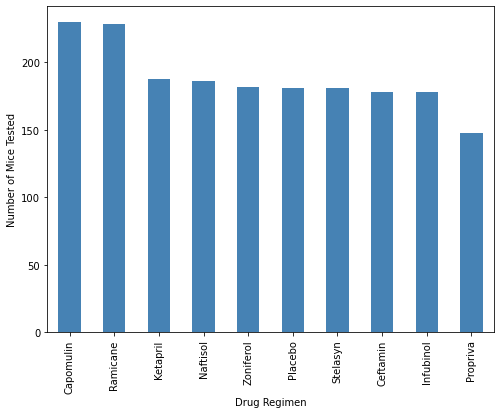

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_number = merged_df_updated.groupby(merged_df_updated["Drug Regimen"])["Timepoint"].count().sort_values(ascending = False)
figure = timepoint_number.plot(kind="bar", facecolor="steelblue", figsize=(8,6),
                                xlabel="Drug Regimen",
                                ylabel="Number of Mice Tested")


Text(0, 0.5, 'Number of Mice Tested')

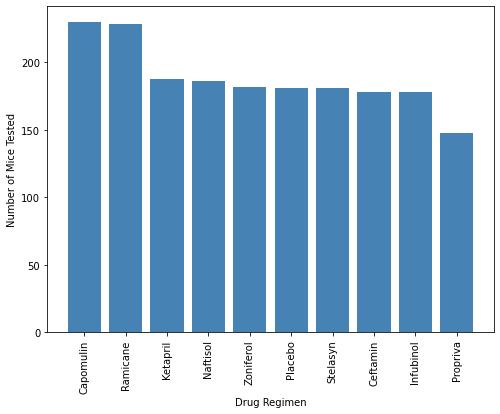

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_number = merged_df_updated.groupby(merged_df_updated["Drug Regimen"])["Timepoint"].count().sort_values(ascending = False)
x_axis = np.arange(len(timepoint_number))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,6))
plt.bar(x_axis, timepoint_number, color='steelblue', align="center")
plt.xticks(tick_locations, timepoint_number.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")



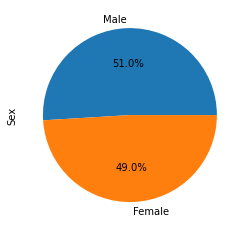

In [183]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = merged_df_updated["Sex"].value_counts()
sex_pie = sex.plot(kind = "pie", y="Sex",autopct="%1.1f%%")

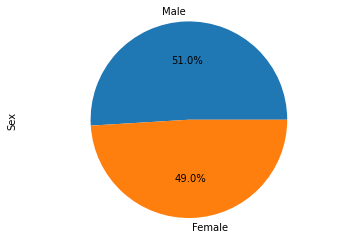

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = merged_df_updated["Sex"].value_counts()
plt.pie(sex, autopct="%1.1f%%",labels=sex.index)
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [185]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens = merged_df_updated.loc[(merged_df_updated["Drug Regimen"] == "Capomulin")|
                                        (merged_df_updated["Drug Regimen"] == "Ramicane")|
                                        (merged_df_updated["Drug Regimen"] == "Infubinol")|
                                        (merged_df_updated["Drug Regimen"] == "Ceftamin") ]
four_regimens.reset_index
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = four_regimens.groupby(four_regimens["Mouse ID"])["Timepoint"].max()
last_timepoint


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_regimens_timepoint = pd.merge(four_regimens,last_timepoint, on=["Mouse ID","Timepoint"], how="inner")
merged_regimens_timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
95,t565,45,34.455298,0,Capomulin,Female,20,17
96,i557,45,47.685963,1,Capomulin,Female,1,24
97,m957,45,33.329098,1,Capomulin,Female,3,19
98,f966,20,30.485985,0,Capomulin,Male,16,17


In [186]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin","Ramicane","Infubinol","Ceftamin"]



# Create empty list to fill with tumor vol data (for plotting)
outlier = []


for treatment in regimens:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    treatment_data = merged_regimens_timepoint.loc[merged_regimens_timepoint["Drug Regimen"]== treatment]["Tumor Volume (mm3)"]
    
    quartiles = treatment_data.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    for i in range(len(treatment_data)):

        if treatment_data.iloc[i] < lower_bound:
            outlier.append(treatment_data.iloc[i])
        elif treatment_data.iloc[i] > upper_bound:
            outlier.append(treatment_data.iloc[i])
            
    print(f"{treatment}'s potential outliners: {outlier}")
    outlier.clear()

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliners: []
Ramicane's potential outliners: []
Infubinol's potential outliners: [36.3213458]
Ceftamin's potential outliners: []


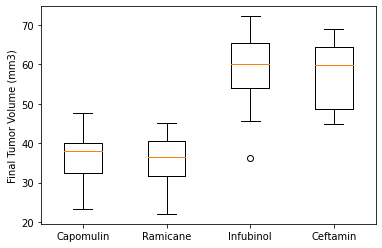

In [187]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Capomulin = merged_regimens_timepoint.loc[merged_regimens_timepoint["Drug Regimen"]== "Capomulin"]["Tumor Volume (mm3)"]
Ramicane = merged_regimens_timepoint.loc[merged_regimens_timepoint["Drug Regimen"]== "Ramicane"]["Tumor Volume (mm3)"]
Infubinol = merged_regimens_timepoint.loc[merged_regimens_timepoint["Drug Regimen"]== "Infubinol"]["Tumor Volume (mm3)"]
Ceftamin = merged_regimens_timepoint.loc[merged_regimens_timepoint["Drug Regimen"]== "Ceftamin"]["Tumor Volume (mm3)"]
all_data = [Capomulin, Ramicane, Infubinol, Ceftamin]

fig, ax = plt.subplots()
ax.boxplot(all_data)
ax.set_xticklabels(regimens)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

<AxesSubplot:title={'center':'Capomulin treatment of mouse l509'}, xlabel='Timepoint(days)', ylabel='Tumor Volume (mm3)'>

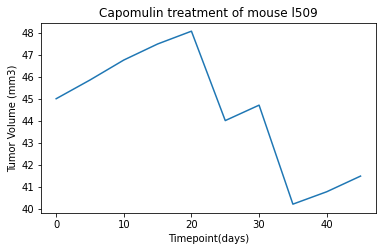

In [188]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_timepoint = four_regimens.loc[four_regimens["Drug Regimen"] == "Capomulin"]
cap_timepoint

mouseID = "l509"
just_one_mouse = cap_timepoint.loc[cap_timepoint["Mouse ID"] == "l509"]
timepoint_and_tumor = just_one_mouse[["Timepoint","Tumor Volume (mm3)"]]
timepoint_and_tumor = timepoint_and_tumor.set_index("Timepoint")
timepoint_and_tumor.plot(kind="line", figsize=(6,3.5), title=f"Capomulin treatment of mouse {mouseID}",
                                xlabel="Timepoint(days)",
                                ylabel="Tumor Volume (mm3)", legend= None)





Text(0, 0.5, 'Average Tumor Volume (mm3)')

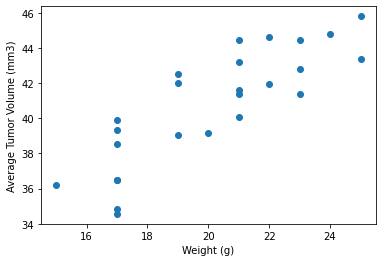

In [189]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tumor = cap_timepoint.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight = cap_timepoint.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(weight,average_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")



## Correlation and Regression

The correlation between mouse weight and the average tmor volune is 0.84


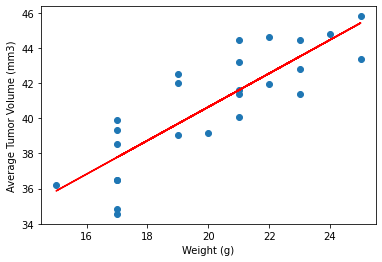

In [190]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight,average_tumor)
print(f"The correlation between mouse weight and the average tmor volune is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_tumor)
regress_values = weight * slope + intercept
plt.scatter(weight,average_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(weight,regress_values,"r-")



